In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import repitl.kernel_utils as ku
from TwoSampleTest import run_experiment_blobs
from utils import sample_blobs, HDGM
from ITL_utils import bestSigmaDivergence
from baselines import train_MMD_O

## Results with different n_RFF

In [2]:
samples_per_blob = [10,20,40,50,70,80,90,100]
n_RFF = [20,50,100,500] # different configurations of RFF that we are going to try
numRepetitions = 10
numTestSets = 10

jsd_results = np.zeros([numRepetitions, numTestSets, len(n_RFF)+1, len(samples_per_blob)]) # including results with the kernel itself
deep_jsd_results = np.zeros([numRepetitions, numTestSets,  len(n_RFF), len(samples_per_blob)])
deep_mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
c2st_s_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
c2st_l_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
for i in range(numRepetitions):
    repId = i+1
    fname = './lcc_results_rff/results_blobs_rff_' + str(repId) + '.npz'
    container = np.load(fname)
    jsd_results[i,:,:,:], deep_jsd_results[i,:,:,:], mmd_results[i,:,:], deep_mmd_results[i,:,:], c2st_s_results[i,:,:], c2st_l_results[i,:,:] = [container[key] for key in container]

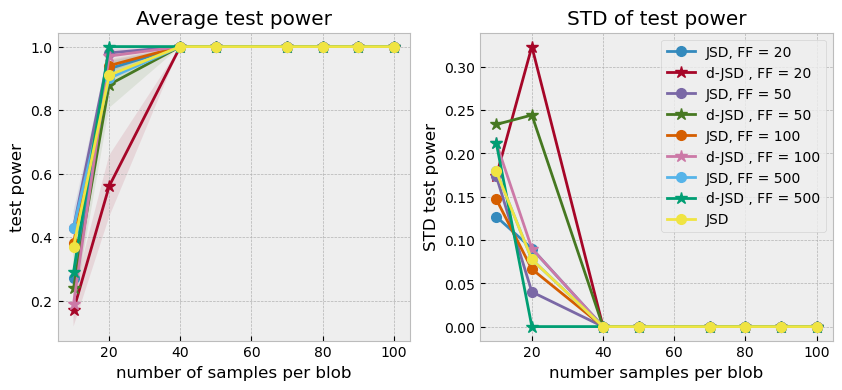

In [4]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')


avg_jsd = np.zeros((len(n_RFF)+1, len(samples_per_blob)))
std_jsd = np.zeros((len(n_RFF)+1, len(samples_per_blob)))
avg_djsd = np.zeros((len(n_RFF)+1, len(samples_per_blob)))
std_djsd = np.zeros((len(n_RFF)+1, len(samples_per_blob)))


for i in range(len(n_RFF)):
    avg_jsd[i,:], std_jsd[i,:] = np.mean(np.mean(jsd_results[:,:,i,:], axis = 1),axis = 0),  np.std(np.mean(jsd_results[:,:,i,:], axis = 1), axis = 0)
    avg_djsd[i,:], std_djsd[i,:] = np.mean(np.mean(deep_jsd_results[:,:,i,:], axis = 1 ),axis = 0), np.std(np.mean(deep_jsd_results[:,:,i,:], axis = 1 ), axis = 0)

avg_jsd[i+1,:], std_jsd[i+1,:] = np.mean(np.mean(jsd_results[:,:,i+1,:], axis = 1),axis = 0),  np.std(np.mean(jsd_results[:,:,i,:], axis = 1), axis = 0)

a = 0.3 # factor to reduce the size of the std
fig, axs = plt.subplots(1,2, figsize=(10,4))

for i in range(len(n_RFF)):
    axs[0].plot(samples_per_blob,avg_jsd[i,:], '-o',markersize=7,label = r'JSD, FF = %d' %n_RFF[i])
    axs[0].fill_between(samples_per_blob,avg_jsd[i,:]-a*std_jsd[i,:],avg_jsd[i,:]+a*std_jsd[i,:],alpha=.1)
    
    axs[0].plot(samples_per_blob,avg_djsd[i,:], '-*' ,markersize=9, label = 'd-JSD , FF = %d' %n_RFF[i])
    axs[0].fill_between(samples_per_blob,avg_djsd[i,:]-a*std_djsd[i,:],avg_djsd[i,:]+a*std_djsd[i,:],alpha=.1)



    axs[1].plot(samples_per_blob,std_jsd[i,:], '-o',markersize=7, label = r'JSD, FF = %d' %n_RFF[i])
    axs[1].plot(samples_per_blob,std_djsd[i,:],'-*',markersize=9,label = 'd-JSD , FF = %d' %n_RFF[i])
    
axs[0].plot(samples_per_blob,avg_jsd[i+1,:], '-o',markersize=7,label = 'JSD')
axs.fill_between(samples_per_blob,avg_jsd[i+1,:]-a*std_jsd[i+1,:],avg_jsd[i+1,:]+a*std_jsd[i+1,:],alpha=.1)
axs[1].plot(samples_per_blob,std_jsd[i,:], '-o',markersize=7, label = 'JSD')

axs[0].set_xlabel("number of samples per blob")
axs[0].set_ylabel("test power")
axs[0].set_title("Average test power")

axs[1].set_title("STD of test power")
axs[1].set_xlabel("number samples per blob")
axs[1].set_ylabel("STD test power")

# handles, labels = plt.gca().get_legend_handles_labels()

# # #specify order of items in legend
# order = [5,0,2,1,3,4]

#add legend to plot
# axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
axs[1].legend()

## Results second experiment

In [2]:
samples_per_blob = [10,20,40,50,70,80,90,100]
numRepetitions = 10
numTestSets = 100

jsd_results = np.zeros([numRepetitions, numTestSets,len(samples_per_blob)])
jsd_results_ff = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])  
jsd_results_rff = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)]) 
deep_jsd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
deep_mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
c2st_s_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
c2st_l_results = np.zeros([numRepetitions, numTestSets, len(samples_per_blob)])
for i in range(numRepetitions):
    repId = i+1
    fname = './blob_results/results_blobs_final__' + str(repId) + '.npz'
    container = np.load(fname)
    jsd_,jsd_rff_,jsd_ff_, deep_jsd_, mmd_, deep_mmd_, c2st_s_, c2st_l_ = [container[key] for key in container]
    
    jsd_results[i,:,:], jsd_results_rff[i,:,:], jsd_results_ff[i,:,:], deep_jsd_results[i,:,:], mmd_results[i,:,:], deep_mmd_results[i,:,:], c2st_s_results[i,:,:], c2st_l_results[i,:,:] = jsd_[i,:,:],jsd_rff_[i,:,:],jsd_ff_[i,:,:],deep_jsd_[i,:,:], mmd_[i,:,:], deep_mmd_[i,:,:], c2st_s_[i,:,:], c2st_l_[i,:,:] 

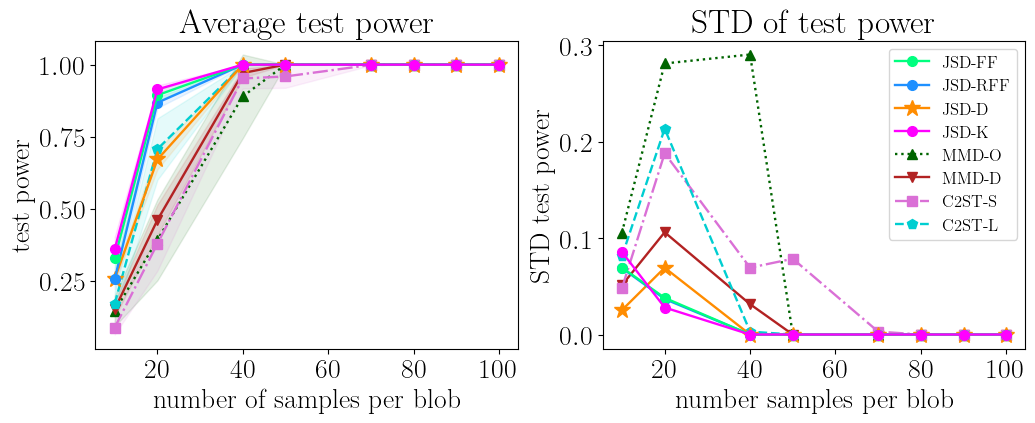

In [3]:
import matplotlib.style
import matplotlib as mpl
# mpl.style.use('bmh')
mpl.rcParams['lines.linewidth'] = 1.7
plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 20}

plt.rc('font', **font)

avg_mmd, std_mmd = np.mean(np.mean(mmd_results, axis = 1 ),axis = 0), np.std(np.mean(mmd_results, axis = 1 ), axis = 0)
avg_dmmd, std_dmmd = np.mean(np.mean(deep_mmd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_mmd_results, axis = 1 ), axis = 0)
avg_jsd, std_jsd = np.mean(np.mean(jsd_results, axis = 1),axis = 0),  np.std(np.mean(jsd_results, axis = 1), axis = 0)
avg_jsd_rff, std_jsd_rff = np.mean(np.mean(jsd_results_rff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_rff, axis = 1), axis = 0)
avg_jsd_ff, std_jsd_ff = np.mean(np.mean(jsd_results_ff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_ff, axis = 1), axis = 0)
avg_djsd, std_djsd = np.mean(np.mean(deep_jsd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_jsd_results, axis = 1 ), axis = 0)
avg_c2st_s, std_c2st_s = np.mean(np.mean(c2st_s_results, axis = 1 ),axis = 0), np.std(np.mean(c2st_s_results, axis = 1 ), axis = 0)
avg_c2st_l, std_c2st_l =np.mean( np.mean(c2st_l_results, axis = 1 ),axis = 0), np.std( np.mean(c2st_l_results, axis = 1 ), axis = 0)

a = 0.5 # factor to reduce the size of the std
fig, axs = plt.subplots(1,2, figsize=(12,4))





axs[0].plot(samples_per_blob,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[0].fill_between(samples_per_blob,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs[0].plot(samples_per_blob,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs[0].fill_between(samples_per_blob,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs[0].plot(samples_per_blob,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs[0].fill_between(samples_per_blob,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs[0].plot(samples_per_blob,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[0].fill_between(samples_per_blob,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs[0].plot(samples_per_blob,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[0].fill_between(samples_per_blob,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs[0].plot(samples_per_blob,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[0].fill_between(samples_per_blob,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs[0].plot(samples_per_blob,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs[0].fill_between(samples_per_blob,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')

axs[0].plot(samples_per_blob,avg_jsd, '-o',markersize=7,label = 'JSD-K', color = 'magenta')
axs[0].fill_between(samples_per_blob,avg_jsd-a*std_jsd,avg_jsd+a*std_jsd,alpha=.1, color  = 'magenta')



axs[0].set_xlabel("number of samples per blob")
axs[0].set_ylabel("test power")
# axs[0].legend()
axs[0].set_title("Average test power")
# plt.fill_between(samples_per_blob, avg_mmd - std_mmd , avg_mmd + std_mmd)




axs[1].plot(samples_per_blob,std_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[1].plot(samples_per_blob,std_dmmd,  '-v', markersize=7, label = 'MMD-D',color = 'firebrick')

axs[1].plot(samples_per_blob,std_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')

# axs[1].plot(samples_per_blob,std_c2st_l,'-p',color = 'lightcoral',markersize=7,label = 'C2ST-L')
# axs[1].plot(samples_per_blob,std_djsd,'-*',color = 'darkorange',markersize=12,label = 'deep JSD')
axs[1].plot(samples_per_blob,std_c2st_l,'--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[1].plot(samples_per_blob,std_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[1].plot(samples_per_blob,std_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[1].plot(samples_per_blob,std_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs[1].plot(samples_per_blob,std_jsd, '-o',markersize=7,label = 'JSD-K', color = 'magenta')

axs[1].set_title("STD of test power")
axs[1].set_xlabel("number samples per blob")
axs[1].set_ylabel("STD test power")

handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,7,0,1,2,3]

#add legend to plot
axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize="12") 
# axs[1].legend()
plt.savefig('./Figures/test_power_blobs.pdf', dpi=300, bbox_inches='tight')



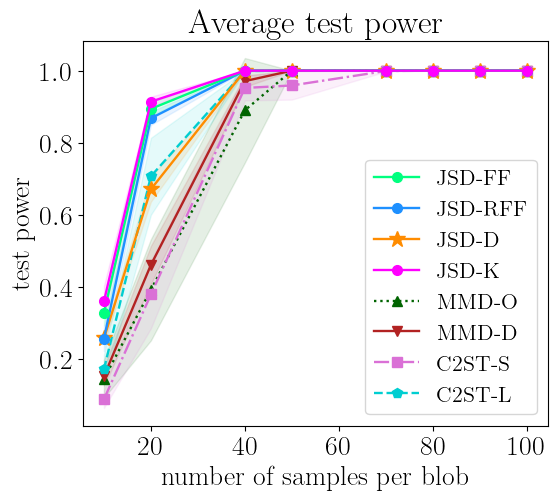

In [4]:
fig, axs = plt.subplots(1,1, figsize=(6,5))
axs.plot(samples_per_blob,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs.fill_between(samples_per_blob,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs.plot(samples_per_blob,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs.fill_between(samples_per_blob,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs.plot(samples_per_blob,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs.fill_between(samples_per_blob,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs.plot(samples_per_blob,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs.fill_between(samples_per_blob,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs.plot(samples_per_blob,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs.fill_between(samples_per_blob,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs.plot(samples_per_blob,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs.fill_between(samples_per_blob,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs.plot(samples_per_blob,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs.fill_between(samples_per_blob,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')

axs.plot(samples_per_blob,avg_jsd, '-o',markersize=7,label = 'JSD-K', color = 'magenta')
axs.fill_between(samples_per_blob,avg_jsd-a*std_jsd,avg_jsd+a*std_jsd,alpha=.1, color  = 'magenta')



axs.set_xlabel("number of samples per blob")
axs.set_ylabel("test power")
# axs[0].legend()
axs.set_title("Average test power")
handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,7,0,1,2,3]

#add legend to plot
axs.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize="16") 
plt.savefig('./Figures/test_blobs_mean.pdf', dpi=300, bbox_inches='tight')

### Results HDGM

In [5]:
samples_per_cluster = 4*np.array([2500,2000,1500,1000,250])
dimension = [10,]
numRepetitions = 10
numTestSets = 100
jsd_results_rff = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster), len(dimension)]) 
jsd_results_ff = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster), len(dimension)])
deep_jsd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
deep_mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
c2st_s_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
c2st_l_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
for i in range(numRepetitions):
    repId = i+1
    fname = './hdgm_results/results_hdgm_n_' + str(repId) + '.npz'
    container = np.load(fname)
    jsd_rff_,jsd_ff_, deep_jsd_, mmd_, deep_mmd_, c2st_s_, c2st_l_ = [container[key] for key in container]
    jsd_results_rff[i,:,:,:], jsd_results_ff[i,:,:,:], deep_jsd_results[i,:,:,:], mmd_results[i,:,:,:], deep_mmd_results[i,:,:,:], c2st_s_results[i,:,:,:], c2st_l_results[i,:,:,:] = jsd_rff_[i,:,:,:],jsd_ff_[i,:,:,:],deep_jsd_[i,:,:,:], mmd_[i,:,:,:], deep_mmd_[i,:,:,:], c2st_s_[i,:,:,:], c2st_l_[i,:,:,:]

In [6]:
jsd_results_rff = np.squeeze(jsd_results_rff)
jsd_results_ff = np.squeeze(jsd_results_ff) 
deep_jsd_results = np.squeeze(deep_jsd_results)
mmd_results = np.squeeze(mmd_results)
deep_mmd_results = np.squeeze(deep_mmd_results)
c2st_s_results = np.squeeze(c2st_s_results)
c2st_l_results = np.squeeze(c2st_l_results)

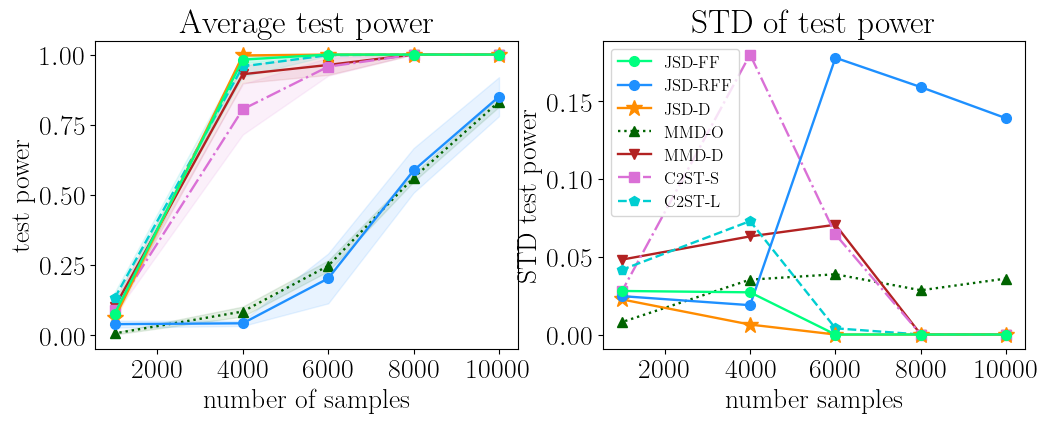

In [7]:
import matplotlib.style
import matplotlib as mpl
# mpl.style.use('bmh')
# mpl.rcParams['lines.linewidth'] = 1.7
avg_mmd, std_mmd = np.mean(np.mean(mmd_results, axis = 1 ),axis = 0), np.std(np.mean(mmd_results, axis = 1 ), axis = 0)
avg_dmmd, std_dmmd = np.mean(np.mean(deep_mmd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_mmd_results, axis = 1 ), axis = 0)
# avg_jsd, std_jsd = np.mean(np.mean(jsd_results, axis = 1),axis = 0),  np.std(np.mean(jsd_results, axis = 1), axis = 0)
avg_jsd_rff, std_jsd_rff = np.mean(np.mean(jsd_results_rff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_rff, axis = 1), axis = 0)
avg_jsd_ff, std_jsd_ff = np.mean(np.mean(jsd_results_ff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_ff, axis = 1), axis = 0)
avg_djsd, std_djsd = np.mean(np.mean(deep_jsd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_jsd_results, axis = 1 ), axis = 0)
avg_c2st_s, std_c2st_s = np.mean(np.mean(c2st_s_results, axis = 1 ),axis = 0), np.std(np.mean(c2st_s_results, axis = 1 ), axis = 0)
avg_c2st_l, std_c2st_l =np.mean( np.mean(c2st_l_results, axis = 1 ),axis = 0), np.std( np.mean(c2st_l_results, axis = 1 ), axis = 0)

a = 0.5 # factor to reduce the size of the std
fig, axs = plt.subplots(1,2, figsize=(12,4))


# axs[0].plot(samples_per_blob,avg_jsd, '-o',markersize=7,label = 'JSD')
# axs[0].fill_between(samples_per_blob,avg_jsd-a*std_jsd,avg_jsd+a*std_jsd,alpha=.1)

axs[0].plot(samples_per_cluster,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[0].fill_between(samples_per_cluster,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs[0].plot(samples_per_cluster,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs[0].fill_between(samples_per_cluster,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs[0].plot(samples_per_cluster,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs[0].fill_between(samples_per_cluster,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs[0].plot(samples_per_cluster,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[0].fill_between(samples_per_cluster,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs[0].plot(samples_per_cluster,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[0].fill_between(samples_per_cluster,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs[0].plot(samples_per_cluster,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[0].fill_between(samples_per_cluster,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs[0].plot(samples_per_cluster,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs[0].fill_between(samples_per_cluster,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')

axs[0].set_xlabel("number of samples")
axs[0].set_ylabel("test power")
# axs[0].legend()
axs[0].set_title("Average test power")
# plt.fill_between(samples_per_blob, avg_mmd - std_mmd , avg_mmd + std_mmd)


# axs[1].plot(samples_per_blob,std_jsd, '-o',markersize=7, label = 'JSD')

axs[1].plot(samples_per_cluster,std_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[1].plot(samples_per_cluster,std_dmmd,  '-v', markersize=7, label = 'MMD-D',color = 'firebrick')

axs[1].plot(samples_per_cluster,std_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')

# axs[1].plot(samples_per_blob,std_c2st_l,'-p',color = 'lightcoral',markersize=7,label = 'C2ST-L')
# axs[1].plot(samples_per_blob,std_djsd,'-*',color = 'darkorange',markersize=12,label = 'deep JSD')
axs[1].plot(samples_per_cluster,std_c2st_l,'--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[1].plot(samples_per_cluster,std_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[1].plot(samples_per_cluster,std_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[1].plot(samples_per_cluster,std_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')


axs[1].set_title("STD of test power")
axs[1].set_xlabel("number samples")
axs[1].set_ylabel("STD test power")

handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize="12") 
# axs[1].legend()
plt.savefig('./Figures/test_hdgm_n.pdf', dpi=300, bbox_inches='tight')

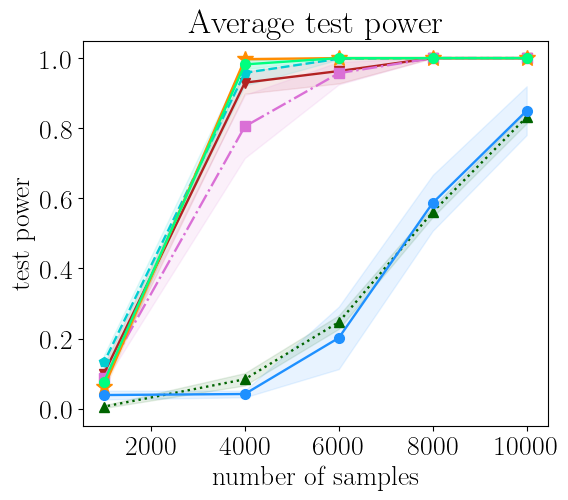

In [8]:
fig, axs = plt.subplots(1,1, figsize=(6,5))
axs.plot(samples_per_cluster,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs.fill_between(samples_per_cluster,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs.plot(samples_per_cluster,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs.fill_between(samples_per_cluster,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs.plot(samples_per_cluster,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs.fill_between(samples_per_cluster,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs.plot(samples_per_cluster,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs.fill_between(samples_per_cluster,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs.plot(samples_per_cluster,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs.fill_between(samples_per_cluster,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs.plot(samples_per_cluster,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs.fill_between(samples_per_cluster,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs.plot(samples_per_cluster,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs.fill_between(samples_per_cluster,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')




axs.set_xlabel("number of samples")
axs.set_ylabel("test power")
# axs[0].legend()
axs.set_title("Average test power")
handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
# axs.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig('./Figures/test_hdgm_n_mean.pdf', dpi=300, bbox_inches='tight')

### HDGM dimensionality

In [9]:
samples_per_cluster = [4000,]
dimension = [3,5,10,15,20]
numRepetitions = 10
numTestSets = 100
jsd_results_rff = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster), len(dimension)]) 
jsd_results_ff = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster), len(dimension)])
deep_jsd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
deep_mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
mmd_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
c2st_s_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])
c2st_l_results = np.zeros([numRepetitions, numTestSets, len(samples_per_cluster),len(dimension)])

for i in range(numRepetitions):
    repId = i+1
    fname = './hdgm_results/results_hdgm_d_' + str(repId) + '.npz'
    container = np.load(fname)
    jsd_rff_,jsd_ff_, deep_jsd_, mmd_, deep_mmd_, c2st_s_, c2st_l_ = [container[key] for key in container]
    jsd_results_rff[i,:,:,:], jsd_results_ff[i,:,:,:], deep_jsd_results[i,:,:,:], mmd_results[i,:,:,:], deep_mmd_results[i,:,:,:], c2st_s_results[i,:,:,:], c2st_l_results[i,:,:,:] = jsd_rff_[i,:,:,:],jsd_ff_[i,:,:,:],deep_jsd_[i,:,:,:], mmd_[i,:,:,:], deep_mmd_[i,:,:,:], c2st_s_[i,:,:,:], c2st_l_[i,:,:,:]
    # print(np.sum(jsd_results_rff), np.sum(jsd_results_ff), np.sum(deep_jsd_results), np.sum(mmd_results), np.sum(deep_mmd_results), np.sum(c2st_s_results), np.sum(c2st_l_results))

In [10]:
jsd_results_rff = np.squeeze(jsd_results_rff)
jsd_results_ff = np.squeeze(jsd_results_ff)
deep_jsd_results = np.squeeze(deep_jsd_results)
mmd_results = np.squeeze(mmd_results)
deep_mmd_results = np.squeeze(deep_mmd_results)
c2st_s_results = np.squeeze(c2st_s_results)
c2st_l_results = np.squeeze(c2st_l_results)

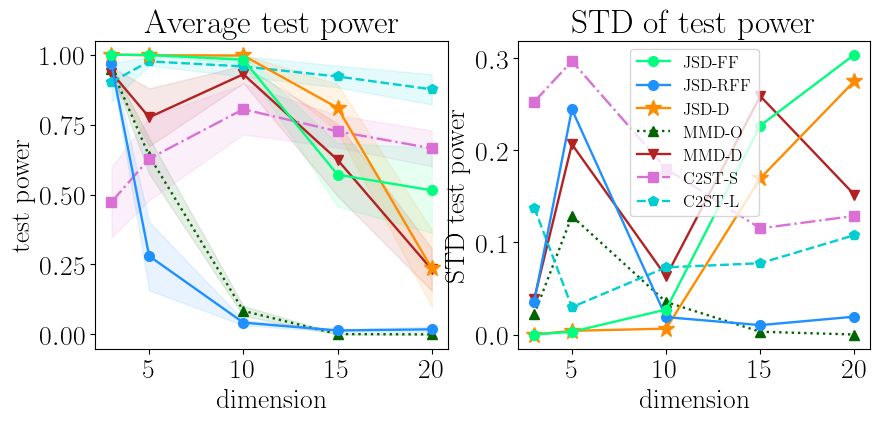

In [11]:
import matplotlib.style
import matplotlib as mpl
# mpl.style.use('bmh')
mpl.rcParams['lines.linewidth'] = 1.7
avg_mmd, std_mmd = np.mean(np.mean(mmd_results, axis = 1 ),axis = 0), np.std(np.mean(mmd_results, axis = 1 ), axis = 0)
avg_dmmd, std_dmmd = np.mean(np.mean(deep_mmd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_mmd_results, axis = 1 ), axis = 0)
# avg_jsd, std_jsd = np.mean(np.mean(jsd_results, axis = 1),axis = 0),  np.std(np.mean(jsd_results, axis = 1), axis = 0)
avg_jsd_rff, std_jsd_rff = np.mean(np.mean(jsd_results_rff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_rff, axis = 1), axis = 0)
avg_jsd_ff, std_jsd_ff = np.mean(np.mean(jsd_results_ff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_ff, axis = 1), axis = 0)
avg_djsd, std_djsd = np.mean(np.mean(deep_jsd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_jsd_results, axis = 1 ), axis = 0)
avg_c2st_s, std_c2st_s = np.mean(np.mean(c2st_s_results, axis = 1 ),axis = 0), np.std(np.mean(c2st_s_results, axis = 1 ), axis = 0)
avg_c2st_l, std_c2st_l =np.mean( np.mean(c2st_l_results, axis = 1 ),axis = 0), np.std( np.mean(c2st_l_results, axis = 1 ), axis = 0)

a = 0.5 # factor to reduce the size of the std
fig, axs = plt.subplots(1,2, figsize=(10,4))


# axs[0].plot(samples_per_blob,avg_jsd, '-o',markersize=7,label = 'JSD')
# axs[0].fill_between(samples_per_blob,avg_jsd-a*std_jsd,avg_jsd+a*std_jsd,alpha=.1)

axs[0].plot(dimension,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[0].fill_between(dimension,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs[0].plot(dimension,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs[0].fill_between(dimension,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs[0].plot(dimension,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs[0].fill_between(dimension,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs[0].plot(dimension,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[0].fill_between(dimension,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs[0].plot(dimension,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[0].fill_between(dimension,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs[0].plot(dimension,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[0].fill_between(dimension,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs[0].plot(dimension,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs[0].fill_between(dimension,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')

axs[0].set_xlabel("dimension")
axs[0].set_ylabel("test power")
# axs[0].legend()
axs[0].set_title("Average test power")
# plt.fill_between(samples_per_blob, avg_mmd - std_mmd , avg_mmd + std_mmd)


# axs[1].plot(samples_per_blob,std_jsd, '-o',markersize=7, label = 'JSD')

axs[1].plot(dimension,std_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[1].plot(dimension,std_dmmd,  '-v', markersize=7, label = 'MMD-D',color = 'firebrick')

axs[1].plot(dimension,std_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')

# axs[1].plot(samples_per_blob,std_c2st_l,'-p',color = 'lightcoral',markersize=7,label = 'C2ST-L')
# axs[1].plot(samples_per_blob,std_djsd,'-*',color = 'darkorange',markersize=12,label = 'deep JSD')
axs[1].plot(dimension,std_c2st_l,'--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[1].plot(dimension,std_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[1].plot(dimension,std_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[1].plot(dimension,std_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')


axs[1].set_title("STD of test power")
axs[1].set_xlabel("dimension")
axs[1].set_ylabel("STD test power")

handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize="12") 
# axs[1].legend()
plt.savefig('./Figures/test_hdgm_d.pdf', dpi=300, bbox_inches='tight')

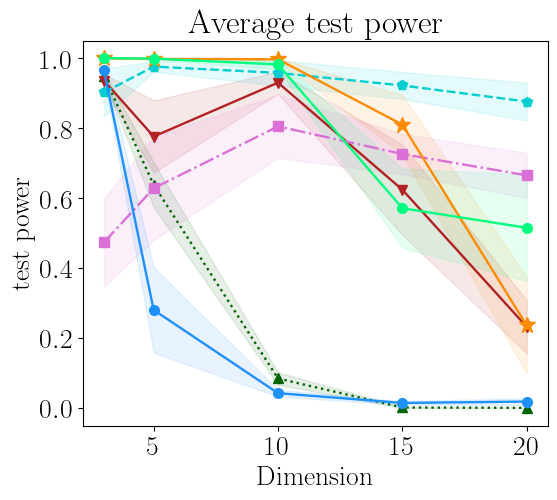

In [12]:
fig, axs = plt.subplots(1,1, figsize=(6,5))
axs.plot(dimension,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs.fill_between(dimension,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs.plot(dimension,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs.fill_between(dimension,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs.plot(dimension,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs.fill_between(dimension,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs.plot(dimension,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs.fill_between(dimension,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs.plot(dimension,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs.fill_between(dimension,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs.plot(dimension,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs.fill_between(dimension,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs.plot(dimension,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs.fill_between(dimension,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')




axs.set_xlabel("Dimension")
axs.set_ylabel("test power")
# axs[0].legend()
axs.set_title("Average test power")
handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
# axs.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig('./Figures/test_hdgm_d_mean.pdf', dpi=300, bbox_inches='tight')

### Higgs results

In [13]:
n_samples = [1000,2000,3000,5000,8000,10000]
numRepetitions = 10 # each core will do one repetition
numTestSets = 100
jsd_results_ff = np.zeros([numRepetitions, numTestSets, len(n_samples)])  
jsd_results_rff = np.zeros([numRepetitions, numTestSets, len(n_samples)])  
deep_jsd_results = np.zeros([numRepetitions, numTestSets, len(n_samples)])
deep_mmd_results = np.zeros([numRepetitions, numTestSets, len(n_samples)])
mmd_results = np.zeros([numRepetitions, numTestSets, len(n_samples)])
c2st_s_results = np.zeros([numRepetitions, numTestSets, len(n_samples)])
c2st_l_results = np.zeros([numRepetitions, numTestSets, len(n_samples)])
for i in range(numRepetitions):
    repId = i+1
    fname = './higgs_results/results_higgs_' + str(repId) + '.npz'
    container = np.load(fname)
    jsd_rff_,jsd_ff_,deep_jsd_, mmd_, deep_mmd_, c2st_s_, c2st_l_ = [container[key] for key in container]
    jsd_results_rff[i,:,:],jsd_results_ff[i,:,:],deep_jsd_results[i,:,:], mmd_results[i,:,:], deep_mmd_results[i,:,:], c2st_s_results[i,:,:], c2st_l_results[i,:,:] = jsd_rff_[i,:,:],jsd_ff_[i,:,:],deep_jsd_[i,:,:], mmd_[i,:,:], deep_mmd_[i,:,:], c2st_s_[i,:,:], c2st_l_[i,:,:]

In [14]:
jsd_results_ff = np.squeeze(jsd_results_ff)
jsd_results_rff = np.squeeze(jsd_results_rff)
deep_jsd_results = np.squeeze(deep_jsd_results)
mmd_results = np.squeeze(mmd_results)
deep_mmd_results = np.squeeze(deep_mmd_results)
c2st_s_results = np.squeeze(c2st_s_results)
c2st_l_results = np.squeeze(c2st_l_results)

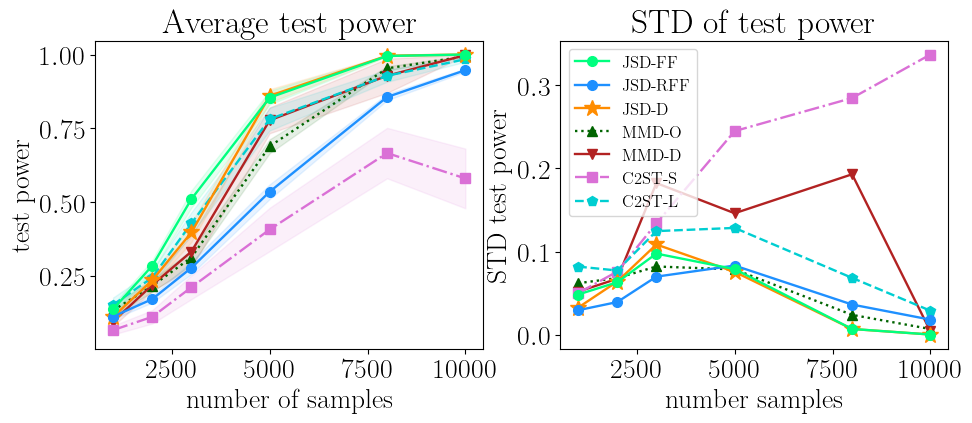

In [15]:
import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('bmh')
# mpl.rcParams['lines.linewidth'] = 1.7
avg_mmd, std_mmd = np.mean(np.mean(mmd_results, axis = 1 ),axis = 0), np.std(np.mean(mmd_results, axis = 1 ), axis = 0)
avg_dmmd, std_dmmd = np.mean(np.mean(deep_mmd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_mmd_results, axis = 1 ), axis = 0)
# avg_jsd, std_jsd = np.mean(np.mean(jsd_results, axis = 1),axis = 0),  np.std(np.mean(jsd_results, axis = 1), axis = 0)
avg_jsd_rff, std_jsd_rff = np.mean(np.mean(jsd_results_rff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_rff, axis = 1), axis = 0)
avg_jsd_ff, std_jsd_ff = np.mean(np.mean(jsd_results_ff, axis = 1),axis = 0),  np.std(np.mean(jsd_results_ff, axis = 1), axis = 0)
avg_djsd, std_djsd = np.mean(np.mean(deep_jsd_results, axis = 1 ),axis = 0), np.std(np.mean(deep_jsd_results, axis = 1 ), axis = 0)
avg_c2st_s, std_c2st_s = np.mean(np.mean(c2st_s_results, axis = 1 ),axis = 0), np.std(np.mean(c2st_s_results, axis = 1 ), axis = 0)
avg_c2st_l, std_c2st_l =np.mean( np.mean(c2st_l_results, axis = 1 ),axis = 0), np.std( np.mean(c2st_l_results, axis = 1 ), axis = 0)

a = 0.3 # factor to reduce the size of the std
fig, axs = plt.subplots(1,2, figsize=(11,4))


# axs[0].plot(samples_per_blob,avg_jsd, '-o',markersize=7,label = 'JSD')
# axs[0].fill_between(samples_per_blob,avg_jsd-a*std_jsd,avg_jsd+a*std_jsd,alpha=.1)

axs[0].plot(n_samples,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[0].fill_between(n_samples,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs[0].plot(n_samples,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs[0].fill_between(n_samples,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs[0].plot(n_samples,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs[0].fill_between(n_samples,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs[0].plot(n_samples,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[0].fill_between(n_samples,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs[0].plot(n_samples,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[0].fill_between(n_samples,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs[0].plot(n_samples,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[0].fill_between(n_samples,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs[0].plot(n_samples,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs[0].fill_between(n_samples,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')

axs[0].set_xlabel("number of samples")
axs[0].set_ylabel("test power")
# axs[0].legend()
axs[0].set_title("Average test power")
# plt.fill_between(samples_per_blob, avg_mmd - std_mmd , avg_mmd + std_mmd)


# axs[1].plot(samples_per_blob,std_jsd, '-o',markersize=7, label = 'JSD')

axs[1].plot(n_samples,std_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs[1].plot(n_samples,std_dmmd,  '-v', markersize=7, label = 'MMD-D',color = 'firebrick')

axs[1].plot(n_samples,std_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')

# axs[1].plot(samples_per_blob,std_c2st_l,'-p',color = 'lightcoral',markersize=7,label = 'C2ST-L')
# axs[1].plot(samples_per_blob,std_djsd,'-*',color = 'darkorange',markersize=12,label = 'deep JSD')
axs[1].plot(n_samples,std_c2st_l,'--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs[1].plot(n_samples,std_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs[1].plot(n_samples,std_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs[1].plot(n_samples,std_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')


axs[1].set_title("STD of test power")
axs[1].set_xlabel("number samples")
axs[1].set_ylabel("STD test power")

handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = 12)
plt.savefig('./Figures/test_higgs.pdf', dpi=300, bbox_inches='tight') 

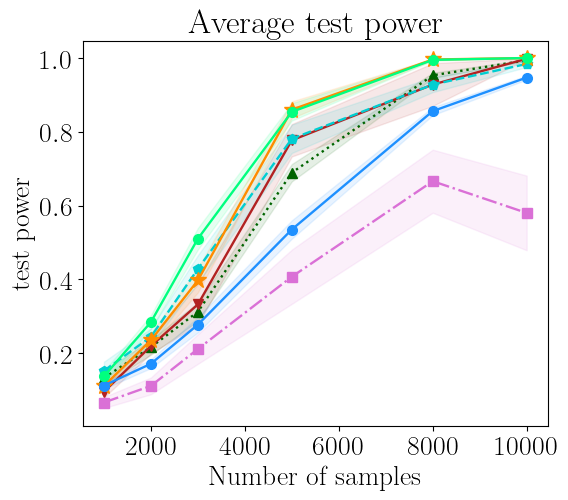

In [16]:
fig, axs = plt.subplots(1,1, figsize=(6,5))
axs.plot(n_samples,avg_mmd,':^', markersize=7,label = 'MMD-O', color = 'darkgreen')
axs.fill_between(n_samples,avg_mmd-a*std_mmd,avg_mmd+a*std_mmd,alpha=.1, color = 'darkgreen')
axs.plot(n_samples,avg_dmmd, '-v', markersize=7, label = 'MMD-D',color = 'firebrick')
axs.fill_between(n_samples,avg_dmmd-a*std_dmmd,avg_dmmd+a*std_dmmd,alpha=.1,color = 'firebrick')

axs.plot(n_samples,avg_c2st_s, '-.s',color = 'orchid',markersize=7, label = 'C2ST-S')
axs.fill_between(n_samples,avg_c2st_s-a*std_c2st_s,avg_c2st_s+a*std_c2st_s,alpha=.1, color = 'orchid')

axs.plot(n_samples,avg_c2st_l, '--p',color = 'darkturquoise',markersize=7, label = 'C2ST-L')
axs.fill_between(n_samples,avg_c2st_l-a*std_c2st_l,avg_c2st_l+a*std_c2st_l,alpha=.1, color = 'darkturquoise')
axs.plot(n_samples,avg_djsd, '-*',markersize=12, label = 'JSD-D', color = 'darkorange')
axs.fill_between(n_samples,avg_djsd-a*std_djsd,avg_djsd+a*std_djsd,alpha=.1,  color = 'darkorange')

axs.plot(n_samples,avg_jsd_rff, '-o',markersize=7,label = 'JSD-RFF', color = 'dodgerblue')
axs.fill_between(n_samples,avg_jsd_rff-a*std_jsd_rff,avg_jsd_rff+a*std_jsd_rff,alpha=.1, color = 'dodgerblue')
axs.plot(n_samples,avg_jsd_ff, '-o',markersize=7,label = 'JSD-FF',color = 'springgreen')
axs.fill_between(n_samples,avg_jsd_ff-a*std_jsd_ff,avg_jsd_ff+a*std_jsd_ff,alpha=.1,color = 'springgreen')




axs.set_xlabel("Number of samples")
axs.set_ylabel("test power")
# axs[0].legend()
axs.set_title("Average test power")
handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
order = [6,5,4,0,1,2,3]

#add legend to plot
# axs.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig('./Figures/test_higgs_mean.pdf', dpi=300, bbox_inches='tight')